The goal of this notebook is to generate the test and training set we will later use, from the original MNIST data set downloaded from www.di.ens.fr/~lelarge/MNIST.tar.gz

The original dataset has a training dataset of 60000 images and a test dataset of 10000 images. They are in 'MNIST/processed/training.pt' and 'MNIST/processed/test.pt'.

The goal of this notebook is to generate a training dataset of 4000 images, by subsampling the original training dataset. And generate a testing dataset of 4000 images, by subsampling the original testing dataset.

WARNING!
Do not run this notebook because it will override the obtained subsampled datasets in /dataset. They are the datasets that have been used to generate the results of the project.

In [28]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path

In [29]:
x_train, y_train = torch.load('MNIST/processed/training.pt')
x_test, y_test = torch.load('MNIST/processed/test.pt')

C:\Users\valentinvuillon\AppData\Local\Temp\ipykernel_97856\2104216237.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load('MNIST/processed/tra

In [30]:
print(y_train.shape)

torch.Size([60000])


In [31]:
print(y_test.shape)

torch.Size([10000])


In [14]:
def subsample(x, y, subset_size):
    # we subsample uniformly at random without replacement.


    # Generate subset_size unique random indices from the original dataset
    random_indices = random.sample(range(len(x)), subset_size)

    # Create a new subset of the dataset using the selected indices
    x_subsampled = x[random_indices]
    y_subsampled = y[random_indices]
    return x_subsampled, y_subsampled

In [15]:
x_train_subsampled, y_train_subsampled = subsample(x_train, y_train, 4000)
x_test_subsampled, y_test_subsampled = subsample(x_test, y_test, 4000)

In [16]:
print(x_train_subsampled.shape)
print(y_train_subsampled.shape)

torch.Size([4000, 28, 28])
torch.Size([4000])


In [17]:
print(x_test_subsampled.shape)
print(y_test_subsampled.shape)

torch.Size([4000, 28, 28])
torch.Size([4000])


(array([376., 452., 403., 400., 382., 369., 388., 432., 397., 401.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

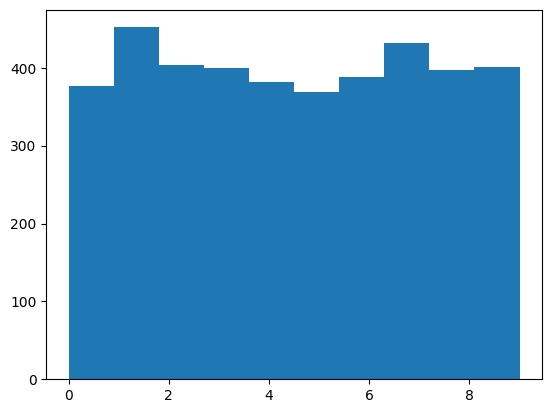

In [18]:
plt.hist(y_train_subsampled) # we verify here that the subsampled training dataset has an uniform distribution of classes

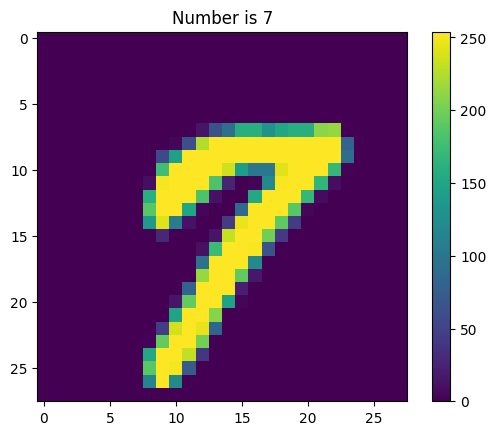

In [19]:
# we verify here that x_train_subsampled and y_train_subsampled contain data that correspond to eachother
i=3
plt.imshow(x_train_subsampled[i].numpy())
plt.title(f'Number is {y_train_subsampled[i].numpy()}')
plt.colorbar()
plt.show()

(array([378., 468., 412., 378., 398., 343., 400., 442., 389., 392.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

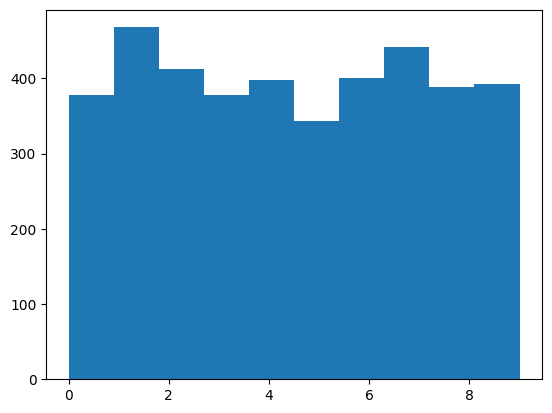

In [20]:
plt.hist(y_test_subsampled) # we verify here that the subsampled testing dataset has an uniform distribution of classes

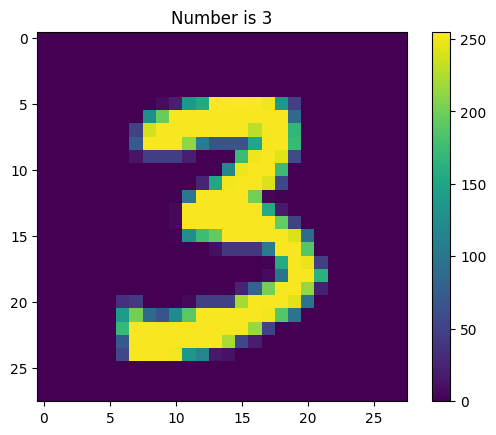

In [21]:
# we verify here that x_test_subsampled and y_test_subsampled contain data that correspond to eachother
i=3
plt.imshow(x_test_subsampled[i].numpy())
plt.title(f'Number is {y_test_subsampled[i].numpy()}')
plt.colorbar()
plt.show()

In [22]:
Path('dataset').mkdir(parents=True, exist_ok=True)

In [23]:
torch.save(x_train_subsampled,'dataset/x_train_subsampled.pt')
torch.save(y_train_susbsampled, 'dataset/y_train_subsampled.pt')

torch.save(x_test_subsampled,'dataset/x_test_subsampled.pt')
torch.save(y_test_subsampled, 'dataset/y_test_subsampled.pt')